## Observations and Insights

## Dependencies and starter code

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?

  Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But, as always, ask a _specific_ question. You'll never get a great answer to "I'm lost."

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import pprint
from matplotlib.pyplot import pie, axis, show

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Define variable for tumor volume
tumor_volumes = combined_mouse_data['Tumor Volume (mm3)']
tumor_volumes.head()

0    45.000000
1    38.825898
2    35.014271
3    34.223992
4    32.997729
Name: Tumor Volume (mm3), dtype: float64

In [3]:
#Define variable for drug regimen
drug_regimens = combined_mouse_data['Drug Regimen']
drug_regimens.head()

0    Ramicane
1    Ramicane
2    Ramicane
3    Ramicane
4    Ramicane
Name: Drug Regimen, dtype: object

## Summary statistics

In [4]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#isolate the unique values per treatment regimen
regimen_count = combined_mouse_data['Drug Regimen'].value_counts()
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

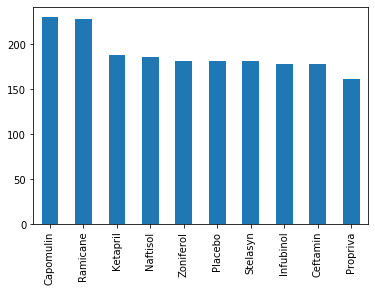

In [6]:
# pandas bar chart
regimen_count.plot(kind = 'bar')
plt.show()

In [7]:
# matplotlib bar chart
# x values
values = combined_mouse_data['Drug Regimen'].values
values

array(['Ramicane', 'Ramicane', 'Ramicane', ..., 'Naftisol', 'Naftisol',
       'Naftisol'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

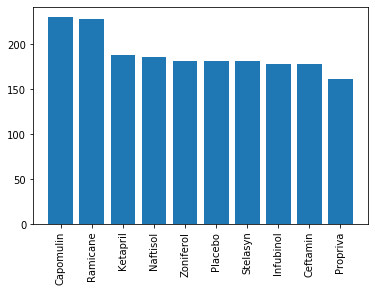

In [8]:
# bar chart matplotlib
x_axis = values
y_axis = regimen_count
plt.bar(regimen_count.index.values, regimen_count)
plt.xticks(rotation=90)

## Pie plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#isolate gender numbers
gender_df = combined_mouse_data.groupby('Sex')['Mouse ID'].nunique()
gender_df

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

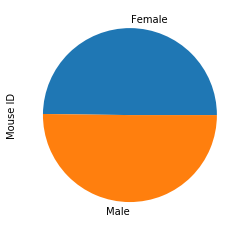

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotpie chart using pandas
gender_df.plot.pie()

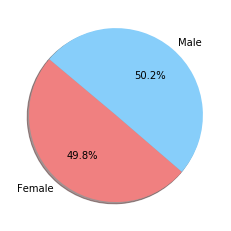

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [124, 125]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, outliers and boxplots

In [12]:
#Create Dataframe containing information related only to Campomulin, Ramicane, Infubinol, and Ceftamin
best_treatment = combined_mouse_data.loc[combined_mouse_data['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]
best_treatment

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [13]:
#Calculate final tumor volume for each mouse ID for Capomulin, Ramicane, Infubinol, and Ceftamin
tum_vol_promising_treatment = best_treatment.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()
tum_vol_promising_treatment


Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a275      Ceftamin        62.999356
a411      Ramicane        38.407618
a444      Ramicane        43.047543
                            ...    
y769      Ceftamin        68.594745
y793      Capomulin       31.896238
y865      Ceftamin        64.729837
z578      Ramicane        30.638696
z581      Infubinol       62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [14]:
#Create Dataframe with Final Tumor Volume by MouseID 
final_tum_vol_mid_df = pd.DataFrame({"Final Tumor Volume (mm3)": tum_vol_promising_treatment})
final_tum_vol_mid_df

,,Final Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


## Line and scatter plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Capomulin by Mouse ID df
Capomulin_graph = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] =="Capomulin"]
Capomulin_graph_df = Capomulin_graph.set_index('Mouse ID')
Capomulin_graph_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,0,45.000000,0
r157,Capomulin,Male,22,25,5,45.597064,0


In [17]:
# Choose one mouse treated by Capomulin
mouse_treatment = Capomulin_graph.loc[Capomulin_graph["Mouse ID"] == 's185']
mouse_treatment

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


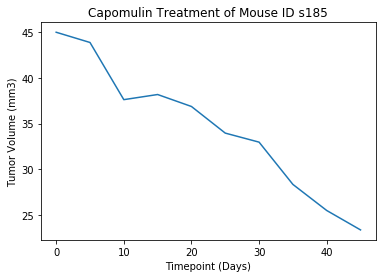

In [18]:
# Generate a line plot 

plt.plot(mouse_treatment["Timepoint"], mouse_treatment["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse ID s185")
plt.show()

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatt_Capomulin_graph = Capomulin_graph.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_tum_cap = pd.DataFrame(scatt_Capomulin_graph.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tum_cap

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


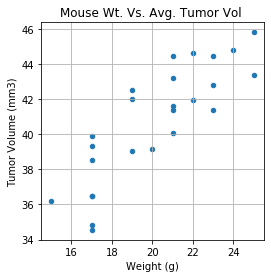

In [23]:
# plot
avg_tum_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Mouse Wt. Vs. Avg. Tumor Vol ")
plt.show()

In [25]:
Capomulin_graph.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [26]:
avg_tum_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

mouse_wt = avg_tum_cap.iloc[:,1]
avg_Tum_Vol = avg_tum_cap.iloc[:,2]

CORR = st.pearsonr(mouse_wt,avg_Tum_Vol)

print(f"The CORR between both factors is {round(CORR[0],2)}")

NameError: name 'st' is not defined

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
''''''
quartiles = final_tum_vol_mid_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

''''''
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

''''''


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
'''
times.sort()
print(times)

temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()
'''

KeyError: 0.25

In [ ]:
'''
times.sort()
print(times)

temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()
'''

In [15]:
#final_tum_vol_mid_df['index'] = range(1, len(final_tum_vol_mid_df) + 1)
#something_here = final_tum_vol_mid_df['index']
#something_here = final_tum_vol_mid_df.reset_index()
#something_here = final_tum_vol_mid_df.set_index('Mouse ID')
#something_here


In [ ]:
#Capomulin_mouse = combined_mouse_data.groupby('')['Mouse ID'].nunique()
#final_tum_vol

final_tum_vol_mid_df = pd.DataFrame({"Final Tumor Volume (mm3)": tum_vol_promising_treatment})
final_tum_vol_mid_df['Index'] = range(1, len(final_tum_vol_mid_df) + 1)
final_tum_vol_mid_df

In [ ]:
regimen_avg = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimen_df = pd.DataFrame({"Mean": regimen_avg, "Median": regimen_median, 
                           "Variance": regimen_var, "Std Dev": regimen_std, "SEM": regimen_sem})
regimen_df

In [ ]:
#df[[col1, col2]] | Returns columns as a new DataFrame
tv_by_dr_df = combined_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']]
tv_by_dr_df.head()

In [ ]:
summary_table_df = pd.DataFrame ({
    tumor_volumes.groupby(drug_regimens).agg(np.mean)
    tumor_volumes.groupby(drug_regimens).agg(np.median)
    tumor_volumes.groupby(drug_regimens).agg(np.var)
    tumor_volumes.groupby(drug_regimens).agg(np.std)
   
})

In [ ]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#NEED TO GO BACK AND FIGURE OUT MAKING A TABLE .describe?
mean_numpy = np.mean(tumor_volumes)
print(f"The mean tumor volume is {mean_numpy}")

median_numpy = np.median(tumor_volumes)
print(f"The median tumor volume is {median_numpy}")

var_numpy = np.var(tumor_volumes,ddof = 0)
print(f"The tumor volume variance is {var_numpy}")

sd_numpy = np.std(tumor_volumes,ddof = 0)
print(f"The tumor volume standard deviation is {sd_numpy}")


In [ ]:
x = combined_mouse_data.loc[combined_mouse_data['Age_months']>=22]
x

In [ ]:
drug_counts_df = combined_mouse_data.groupby('Drug Regimen').agg({'Mouse ID': ['count']}).count
drug_counts_df

In [ ]:
#Isolate the data point count for each treatment
drug_counts_df = combined_mouse_data.groupby('Drug Regimen').agg({'Mouse ID': ['count']})
drug_counts_df

In [ ]:
#Generate bar plot
drug_regimens = combined_mouse_data['Drug Regimen']
x_axis = data_points

plt.bar(x_axis, , color='r', alpha=0.5, align="center")

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#isolate the unique values per treatment regimen
data_points = combined_mouse_data.groupby('Drug Regimen')['Mouse ID'].nunique()
data_points

In [ ]:
# Generate a bar plot
= combined_mouse_data.groupby('Drug Regimen')
df.count()

In [ ]:
drug_counts_df = combined_mouse_data.groupby('Drug Regimen')
drug_counts_df.count()

In [ ]:
#Generate bar plot
data_points.plot.bar()

#add label and title
plt.title("Total Data Points by Drug Regimen")
plt.ylabel("Total Data Points")